<a href="https://colab.research.google.com/github/FarrazNouval/fcc-machine-learning-projects/blob/main/sms_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk


In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# Getting The Data

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

# Load The Data

In [4]:
train_data = pd.read_csv('train-data.tsv', sep='\t', names=['label', 'inputs'])


In [5]:
test_data = pd.read_csv('valid-data.tsv', sep='\t', names=['label', 'inputs'])


# Change Label Into Number Form

In [6]:
train_data['label'] = [1 if i == 'spam' else 0 for i in train_data.label]


In [7]:
test_data['label'] = [1 if i == 'spam' else 0 for i in test_data.label]

# Make Functions To Prepare The Data For Building Model
* remove stopwords
* remove punctuations
* lemmatize every words

In [8]:
# preprocesing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

sw = stopwords.words('english')
punct = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

# function remove stopwords from the text
def remove_sw(text):
  no_sw = [word.lower() for word in text.split() if word.lower() not in set(sw)]
  no_sw = ' '.join(no_sw)
  no_sw = no_sw.strip()

  return no_sw

# function to remove punctuation from the text
def remove_punct(text):
  no_punct = ''
  for i in text:
    if i in punct:
      no_punct += ' '
    else:
      no_punct += i
  
  return no_punct

# function to lemmatize the text
def lemmatizing(text):
  lemmat = [lemmatizer.lemmatize(word) for word in text.split()]
  lemmat = ' '.join(lemmat)
  lemmat = lemmat.strip()

  return lemmat


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Apply Functions To The Data And See The Difference

In [9]:
train_data['no_sw'] = train_data.inputs.map(remove_sw)
train_data['no_punct'] = train_data.no_sw.map(remove_punct)
train_data['lemmatized'] = train_data.no_punct.map(lemmatizing)

train_data


,label,inputs,no_sw,no_punct,lemmatized
0,0,ahhhh...just woken up!had a bad dream about u ...,"ahhhh...just woken up!had bad dream u tho,so d...",ahhhh just woken up had bad dream u tho so d...,ahhhh just woken up had bad dream u tho so don...
1,0,you can never do nothing,never nothing,never nothing,never nothing
2,0,"now u sound like manky scouse boy steve,like! ...","u sound like manky scouse boy steve,like! trav...",u sound like manky scouse boy steve like trav...,u sound like manky scouse boy steve like trave...
3,0,mum say we wan to go then go... then she can s...,mum say wan go go... shun bian watch da glass ...,mum say wan go go shun bian watch da glass ...,mum say wan go go shun bian watch da glass exh...
4,0,never y lei... i v lazy... got wat? dat day ü ...,never lei... v lazy... got wat? dat day ü send...,never lei v lazy got wat dat day ü send...,never lei v lazy got wat dat day ü send da url...
...,...,...,...,...,...
4174,0,just woke up. yeesh its late. but i didn't fal...,woke up. yeesh late. fall asleep til &lt;#&gt; :/,woke up yeesh late fall asleep til lt gt,woke up yeesh late fall asleep til lt gt
4175,0,what do u reckon as need 2 arrange transport i...,"u reckon need 2 arrange transport u can't it, ...",u reckon need 2 arrange transport u can t it ...,u reckon need 2 arrange transport u can t it t...
4176,1,free entry into our £250 weekly competition ju...,free entry £250 weekly competition text word w...,free entry £250 weekly competition text word w...,free entry £250 weekly competition text word w...
4177,1,-pls stop bootydelious (32/f) is inviting you ...,-pls stop bootydelious (32/f) inviting friend....,pls stop bootydelious 32 f inviting friend ...,pls stop bootydelious 32 f inviting friend rep...


In [10]:
max_word = 1000
maxlen = 500


# Represent Words As Numbers

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

tokenizer = Tokenizer(num_words=max_word)
tokenizer.fit_on_texts(train_data.lemmatized)

word_index = tokenizer.word_index

#sequencing
vectors = tokenizer.texts_to_sequences(train_data.lemmatized)
pad_vectors = sequence.pad_sequences(vectors, maxlen)


In [12]:
print(train_data.lemmatized.values[0])
print(vectors[0])
print(pad_vectors[0])


ahhhh just woken up had bad dream u tho so dont like u right didnt know anything comedy night guess im it
[877, 214, 338, 246, 1, 628, 255, 50, 19, 1, 101, 392, 16, 116, 62, 247, 97, 29]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  

# Build Model Construction

In [16]:
from keras import layers

inputs = tf.keras.layers.Input(shape=[maxlen])
prog = tf.keras.layers.Embedding(max_word, 32, input_length=maxlen)(inputs)
prog = tf.keras.layers.LSTM(64)(prog)

prog = tf.keras.layers.Dense(128, activation='relu')(prog)
prog = tf.keras.layers.Dropout(0.2)(prog)
prog = tf.keras.layers.Dense(1, activation='relu')(prog)

model = tf.keras.models.Model(inputs=inputs, outputs=prog)
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 500, 32)           32000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 65,281
Trainable params: 65,281
Non-trainable

# Set Callbacks

In [14]:
# model checkpoint callback
set_cp = tf.keras.callbacks.ModelCheckpoint(filepath='/content/best_model.h5',
                                            monitor='accuracy',
                                            save_best_only=True,
                                            verbose=1)

# reduce LR callback
set_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                              min_lr=0.0001,
                                              patience=6,
                                              verbose=1)

# custom callback to stop when the model reaches the expected accuracy
class Specific_Stopper(tf.keras.callbacks.Callback):
  def __init__(self, exp_acc, exp_val):
    super(Specific_Stopper).__init__()
    self.exp_acc = exp_acc
    self.exp_val = exp_val

  def on_epoch_end(self, epoch, logs=None):
    acc = logs.get('accuracy')
    val = logs.get('val_accuracy')
    if (acc >= self.exp_acc) and (val >= self.exp_val):
      print('Model sudah sampai akurasi yang diharapkan. \n akurasi : {}, akurasi validasi : {}. Proses learning dihentikan'.format(round(acc, 3), val))
      self.model.stop_training = True

set_stop = Specific_Stopper(0.95, 0.95)


# Train Model

In [17]:
history = model.fit(x=pad_vectors,
                   y=train_data.label.values,
                   epochs = 500,
                   callbacks=[set_cp, set_lr, set_stop],
                   validation_split=0.2)

Epoch 1/500
105/105 [==============================] - ETA: 0s - loss: 0.2239 - accuracy: 0.9330
Epoch 1: accuracy improved from 0.86719 to 0.93299, saving model to /content/best_model.h5
105/105 [==============================] - 30s 265ms/step - loss: 0.2239 - accuracy: 0.9330 - val_loss: 0.1509 - val_accuracy: 0.9809 - lr: 0.0010
Epoch 2/500
105/105 [==============================] - ETA: 0s - loss: 0.0960 - accuracy: 0.9850
Epoch 2: accuracy improved from 0.93299 to 0.98504, saving model to /content/best_model.h5
Model sudah sampai akurasi yang diharapkan. 
 akurasi : 0.985, akurasi validasi : 0.9868420958518982. Proses learning dihentikan
105/105 [==============================] - 27s 261ms/step - loss: 0.0960 - accuracy: 0.9850 - val_loss: 0.1314 - val_accuracy: 0.9868 - lr: 0.0010


# Model Evaluation

In [18]:
#prepare data for evaluation

test_data['inputs'] = test_data['inputs'].map(remove_sw)
test_data['inputs'] = test_data['inputs'].map(remove_punct)
test_data['inputs'] = test_data['inputs'].map(lemmatizing)

test_data

,label,inputs
0,0,hospital da return home evening
1,0,much textin bout you
2,0,probably eat today think i m gonna pop weekend...
3,0,don‘t give flying monkey wot think certainly d...
4,0,seeing
...,...,...
1387,0,true dear i sat pray evening felt so so sm d time
1388,0,shower baby
1389,0,yuou working getting pc mom s find spot would ...
1390,1,ur cash balance currently 500 pound maximize u...


In [19]:
val_sequences = tokenizer.texts_to_sequences(test_data.inputs.values)
val_pad = sequence.pad_sequences(val_sequences, maxlen)

val_pad

array([[  0,   0,   0, ..., 928,  45, 435],
       [  0,   0,   0, ...,  68, 706,  24],
       [  0,   0,   0, ...,   1, 112,  32],
       ...,
       [  0,   0,   0, ..., 132,  80,  30],
       [  0,   0,   0, ..., 866, 867, 602],
       [  0,   0,   0, ...,  28,  44, 291]], dtype=int32)

In [20]:
model.evaluate(val_pad, test_data.label.values)


44/44 [==============================] - 3s 57ms/step - loss: 0.1119 - accuracy: 0.9828


[0.11192721128463745, 0.982758641242981]

# Monitor Model's Accuracy and Loss

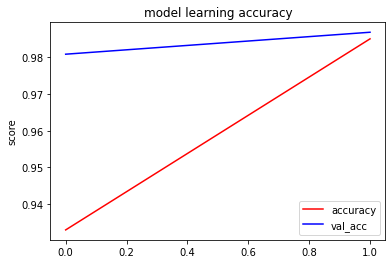

In [21]:
plt.plot(history.history['accuracy'], label='accuracy', color='r')
plt.plot(history.history['val_accuracy'], label='val_acc', color='b')
plt.ylabel('score')
plt.title('model learning accuracy')
plt.legend()


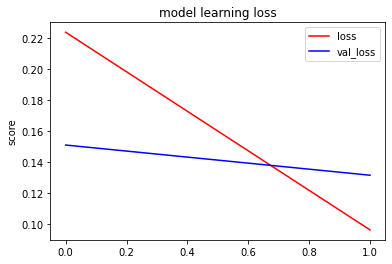

In [22]:
plt.plot(history.history['loss'], label='loss', color='r')
plt.plot(history.history['val_loss'], label='val_loss', color='b')
plt.ylabel('score')
plt.title('model learning loss')
plt.legend()


# Test Make Some Prediction

In [23]:
test_text = 'we see your account buy our shoes with 1000 dollars amount of transaction, type  1 to cancel this transaction'
test_text = remove_sw(test_text)
test_text = remove_punct(test_text)
test_text = lemmatizing(test_text)
test_text_seq = tokenizer.texts_to_sequences([test_text, test_text])
test_text_seq_pad = sequence.pad_sequences(test_text_seq, maxlen)
test_text_seq_pad[0].shape

(500,)

In [24]:
model.predict(test_text_seq_pad)


1/1 [==============================] - 0s 450ms/step


array([[0.6972578],
       [0.6972578]], dtype=float32)

In [25]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  #prepare for prediction
  pred_text = remove_sw(pred_text)
  pred_text = remove_punct(pred_text)
  pred_text = lemmatizing(pred_text)
  pred_text_seq = tokenizer.texts_to_sequences([pred_text, pred_text])
  pred_text_seq_pad = sequence.pad_sequences(pred_text_seq, maxlen)

  prediksi = model.predict(pred_text_seq_pad)
  prediksi = prediksi[0][0]
  
  prediction = [prediksi]
  if prediksi > 0.5:
    prediction.append('spam')
  else:
    prediction.append('ham')


  return (prediction)

pred_text = "wow, is your arm alright. that happened to me one time too"
prediction = predict_message(pred_text)
print(prediction)

1/1 [==============================] - 0s 44ms/step
[0.0, 'ham']


In [26]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 [==============================] - 0s 38ms/step
You passed the challenge. Great job!
